# Say Realz Assignment EDA

Done by: Zhen Xuan, Shavonne, Kevin

Dataset from UCI Machine Learning Repository: **"Bike Sharing Dataset Data Set"**

Compilation of Dataset: *Hadi Fanaee-T*  

Source: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset (requires Login)


# Problem Statement:

The problem statement for this dataset is to predict the total number of bikes rented based on the available information. Our goal is to predict the number of bikes rented per hour based on weather and time-related features, to help bike-sharing companies improve bike availability and optimize pricing strategies.
 
This would be a regression problem, and the learning outcome would be to build a model that can accurately predict the number of bikes rented on a given day, which can help bike-sharing companies optimize their inventory and resources.

# Guiding Questions to our Problem Statement:

Given our problem statement, we will like to have some guiding question so that it can aids us in analysing and forming our hypothesis of our goal.

1. What is the distribution of the target variable (`cnt`) and how does it relate to the other features in the dataset?
2. How does the total number of bikes rented vary by hour of the day, day of the week, and month of the year?
3. How do weather-related features (such as temperature, humidity, and windspeed) affect the total number of bikes rented?
4. How do different types of holidays and working days affect the number of bikes rented?
5. Are there any patterns or trends in the usage of bikes by registered vs. casual users?
6. Can we identify any seasonality in the data? For example, do people rent more bikes in the summer compared to the winter?
7. How does the distribution of the numerical features (such as temperature, humidity, and windspeed) look like? Are there any skewed distributions? If so, how can we handle them?
8. Are there any missing values in the dataset? How can we handle them? Can we impute missing values or remove the rows with missing values?
9. Are there any outliers in the data that could affect our analysis or model? How can we handle them?
10. Can we identify any correlations or relationships between the different features? For example, does temperature have a strong correlation with the number of bikes rented?
11. How well does the model perform in predicting the number of bikes rented? What metrics can we use to evaluate the performance of our model?
12. Can we identify any features that are not useful in predicting the number of bikes rented? Can we remove them from the dataset to improve the model's performance or reduce complexity?



---

### Essential Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

Importing the Basic Libraries

In [131]:
%matplotlib inline
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Notebook outline
3. Feature Engineering \
3.1. An Introduction  \
3.2. Feature Construction & Selection \
3.2.1. Feature Construction: Peak Hour \
3.2.2. Welch’s ANOVA Test \
3.2.3. Dummy Coding \
3.2.4. Feature Selection: Dropping of Redundant Variables \
3.2.5. Feature Coding \
3.3. Feature Scaling \
3.3.1. Normalisation of Numerical Variables \
3.3.2. Box-Cox Transformation <br> 
3.4. Dropping of Low Correlation Values

---

## Import the Dataset

Importing Dataset for Bike Sharing from "hour.csv"

First, we imported the dataset for Bike Sharing from “hour.csv”.

In [132]:
bike_data_hour = pd.read_csv('preprocessed_hour.csv')
bike_data_hour.head()

,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,Spring,2011,1,0,0,Saturday,0,Clear or Cloudy,3.28,3.0014,81.0,0.0,3,13,16
1,2011-01-01,Spring,2011,1,1,0,Saturday,0,Clear or Cloudy,2.34,1.9982,80.0,0.0,8,32,40
2,2011-01-01,Spring,2011,1,2,0,Saturday,0,Clear or Cloudy,2.34,1.9982,80.0,0.0,5,27,32
3,2011-01-01,Spring,2011,1,3,0,Saturday,0,Clear or Cloudy,3.28,3.0014,75.0,0.0,3,10,13
4,2011-01-01,Spring,2011,1,4,0,Saturday,0,Clear or Cloudy,3.28,3.0014,75.0,0.0,0,1,1


In [133]:
bike_data_hour.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           17379 non-null  object 
 1   season             17379 non-null  object 
 2   year               17379 non-null  int64  
 3   month              17379 non-null  int64  
 4   hour               17379 non-null  int64  
 5   is_holiday         17379 non-null  int64  
 6   weekday            17379 non-null  object 
 7   is_workingday      17379 non-null  int64  
 8   weather_situation  17379 non-null  object 
 9   temp               17379 non-null  float64
 10  atemp              17379 non-null  float64
 11  humidity           17379 non-null  float64
 12  windspeed          17379 non-null  float64
 13  casual             17379 non-null  int64  
 14  registered         17379 non-null  int64  
 15  total_count        17379 non-null  int64  
dtypes: float64(4), int64(8

---
## 3. Feature Engineering 

### 3.1. An Introduction 
Feature engineering is the process of selecting, manipulating and transforming raw data into features that can be used in supervised learning. In other words, we aim to convert raw observations and correlations between variables to form desired features. 


### 3.2. Feature Construction & Selection

#### 3.2.1. Feature Construction: Peak Hour

Based on our previous analyses of the Categorical Variable’s Point Plots and their overall trends, we create a new variable named `is_peak_hour` to see if there is a relationship with `total_count`.

In [134]:
bike_data_hour['is_peak_hour'] = bike_data_hour.apply(lambda row: 'Is Peak Hour' if (((row['hour'] >= 6 and row['hour'] <= 9) or (row['hour'] >= 17 and row['hour'] <= 19)) and row['is_workingday'] == 1) or ((row['hour'] >= 10 and row['hour'] <= 16) and row['is_workingday'] == 0) else 'Not Peak Hour', axis=1)

bike_data_hour['is_peak_hour'] = bike_data_hour.is_peak_hour.astype('category')


In [135]:
bike_data_hour.sample(10)

,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,total_count,is_peak_hour
9897,2012-02-22,Spring,2012,2,10,0,Wednesday,1,Clear or Cloudy,7.98,7.0010,71.0,6.0032,17,122,139,Not Peak Hour
11825,2012-05-12,Summer,2012,5,22,0,Saturday,0,Clear or Cloudy,18.32,18.9998,68.0,8.9981,62,212,274,Not Peak Hour
9782,2012-02-17,Spring,2012,2,13,0,Friday,1,Clear or Cloudy,10.80,11.0006,43.0,23.9994,34,171,205,Not Peak Hour
11908,2012-05-16,Summer,2012,5,9,0,Wednesday,1,Misty or Foggy,20.20,22.0028,78.0,8.9981,33,314,347,Is Peak Hour
10424,2012-03-15,Spring,2012,3,11,0,Thursday,1,Clear or Cloudy,18.32,18.9998,60.0,8.9981,60,151,211,Not Peak Hour
376,2011-01-17,Spring,2011,1,4,1,Monday,0,Misty or Foggy,0.46,-2.9980,43.0,8.9981,1,2,3,Not Peak Hour
11495,2012-04-29,Summer,2012,4,4,0,Sunday,0,Misty or Foggy,8.92,7.0010,87.0,8.9981,0,4,4,Not Peak Hour
11416,2012-04-25,Summer,2012,4,21,0,Wednesday,1,Clear or Cloudy,16.44,17.0000,52.0,8.9981,27,212,239,Not Peak Hour
14891,2012-09-17,Fall,2012,9,16,0,Monday,1,Misty or Foggy,22.08,24.0026,69.0,16.9979,74,379,453,Not Peak Hour
4627,2011-07-16,Fall,2011,7,17,0,Saturday,0,Clear or Cloudy,27.72,28.9988,45.0,15.0013,234,241,475,Not Peak Hour


#### 3.2.2. Welch’s ANOVA Test 

**Introduction** <br>
ANOVA is an analysis of variance, and ANOVA TEST is used to test whether the means of 2 populations are equal by comparing the 2 means. In particular, Welch’s ANOVA Test is applied when there is a difference between the variations of 2 populations, and when their sample sizes are unequal.

**Why Welch’s ANOVA Test?**

Welch’s ANOVA Test is considered an alternative to the classic/traditional ANOVA test that is used when the assumptions for ANOVA test fail. In other words, it can be used even if the data violates the assumption of homogeneity of variances. While Welch’s ANOVA can test datasets which do not meet the equality of variances, they still retain the ANOVA assumptions of normality and independence. 

It is important to note that while our dataset is not entirely normal, doing Welch’s ANOVA Test will provide a more accurate result of comparison compared to the traditional ANOVA Test.


**How we implemented Welch’s ANOVA Test**

We applied Welch’s ANOVA Test to multiple variables to determine if they have any statistical correlation with `total_count`.


In [136]:
import pingouin as pg
from pingouin import anova

aov = pg.welch_anova(data=bike_data_hour, dv="total_count", between="season")
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,season,3,9462.112865,606.725446,0.0,0.065988


In [137]:
aov = pg.welch_anova(data=bike_data_hour, dv="total_count", between="year")
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,year,1,14887.70649,1168.359885,1.384379e-246,0.062748


In [138]:
aov = pg.welch_anova(data=bike_data_hour, dv="total_count", between="month")
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,month,11,6828.457173,191.408853,0.0,0.075049


In [139]:
aov = pg.welch_anova(data=bike_data_hour, dv="total_count", between="hour")
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,hour,23,6137.897563,1744.189112,0.0,0.501493


In [140]:
aov = pg.welch_anova(data=bike_data_hour, dv="total_count", between="is_holiday")
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,is_holiday,1,539.612842,22.035328,0.000003,0.000956


In [141]:
aov = pg.welch_anova(data=bike_data_hour, dv="total_count", between="weekday")
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,weekday,6,7717.427774,3.780615,0.00092,0.001203


In [142]:
aov = pg.welch_anova(data=bike_data_hour, dv="total_count", between="is_workingday")
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,is_workingday,1,11444.684512,16.76958,0.000042,0.000917


In [143]:
aov = pg.welch_anova(data=bike_data_hour, dv="total_count", between="weather_situation")
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,weather_situation,3,10.004584,168.381931,7.352545e-09,0.021486


**Analysis**

We compare the resulting p-values to our significance level of 0.05 to determine whether the differences between the means are statistically significant. 

We see that all variables failed the null hypothesis, having extremely low p-values of either numbers very close to zero, or a value so small that the computer returns 0.0. Hence, we have sufficient evidence to reject the null hypothesis and conclude that there is a statistically significant difference in the means of all variables?

While the results indicate that not all group means are equal, it does not indicate which groups are the ones with the statistically significant means. However, now that we have established that there is a difference, we now can move on to dummy coding in order to identify the variables that are different, and determine which category has higher correlation with the `total_count`.


#### 3.2.3. Dummy Coding

**Why Dummy Coding?** <BR>
We dummy code to sift out the different categories among the various categorical variables that have a strong relationship with `total_count` and are statistically significant.


In [144]:
# create dummy variables
dummies = pd.get_dummies(bike_data_hour['season'], prefix='season')

# concatenate with original DataFrame
bike_data_hour = pd.concat([bike_data_hour, dummies], axis=1)

In [145]:
# create dummy variables
dummies = pd.get_dummies(bike_data_hour['year'], prefix='year')

# concatenate with original DataFrame
bike_data_hour = pd.concat([bike_data_hour, dummies], axis=1)

In [146]:
# create dummy variables
dummies = pd.get_dummies(bike_data_hour['month'], prefix='month')

# concatenate with original DataFrame
bike_data_hour = pd.concat([bike_data_hour, dummies], axis=1)

In [147]:
# create dummy variables
dummies = pd.get_dummies(bike_data_hour['hour'], prefix='hour')

# concatenate with original DataFrame
bike_data_hour = pd.concat([bike_data_hour, dummies], axis=1)

In [148]:
# create dummy variables
dummies = pd.get_dummies(bike_data_hour['is_holiday'], prefix='is_holiday')

# concatenate with original DataFrame
bike_data_hour = pd.concat([bike_data_hour, dummies], axis=1)

In [149]:
# create dummy variables
dummies = pd.get_dummies(bike_data_hour['weekday'], prefix='weekday')

# concatenate with original DataFrame
bike_data_hour = pd.concat([bike_data_hour, dummies], axis=1)

In [150]:
# create dummy variables
dummies = pd.get_dummies(bike_data_hour['is_workingday'], prefix='is_workingday')

# concatenate with original DataFrame
bike_data_hour = pd.concat([bike_data_hour, dummies], axis=1)

In [151]:
# create dummy variables
dummies = pd.get_dummies(bike_data_hour['weather_situation'], prefix='weather_situation')

# concatenate with original DataFrame
bike_data_hour = pd.concat([bike_data_hour, dummies], axis=1)

**Analysis** <br> 
After dummy coding, we have split up each categorical variable into their categories. Hence, the original categorical variables that contained all categories can now be removed via dropping. Moving forward, we will be focusing on each category individually. 


#### 3.2.4. Feature Selection: Dropping of Redundant Variables 

From the previous EDA analyses, namely the scatter plot as well as correlation coefficient matrix plot, we choose to drop certain variables that we deem to be redundant. 

In [152]:
# Dropping Casual & Registered & is_working
bike_data_hour.drop(['casual', 'registered','is_workingday','datetime','atemp','year','month','hour','weekday','is_holiday','weather_situation','weather_situation_Stormy or Icy'], axis=1, inplace=True)


**Dropping `registered` and `casual` users**

Referring back to the two scatter plots of `casual` against `total_count` and `registered` against `total_count`, there was a very strong positive relationship between those two variables and `total_count` respectively.

`casual` had a positive relation of 0.69 to `total_count`, while `registered` had a nearly perfect positive relation of 0.97. 

We also know from the dataset description that total number of users = number of casual users + number of registered users, where `casual` and `registered` collectively gives us `total_count`. We hence do not want to use `casual` and `registered` in our model as it will greatly affect the accuracy of our data. Instead, we want to focus on finding other more significant and independent variables that can influence `total_count`.

Therefore, we choose to drop `casual` and `registered`.


**Dropping `atemp`** 

We also see that the correlation coefficient between `temp` and `atemp` is 0.99, almost a perfect positive and indicating a very strong positive correlation despite being supposedly independent variables.
This is an indication of multicollinearity, which is when two or more independent variables in a model are correlated in a multiple regression equation.

Because multicollinearity results in less reliable statistical inferences and undermines the statistical significance of an independent variable, we drop `atemp`.


**Dropping `weather_situation_Stormy or Icy`**

We also see from our previous anaylsis that `Stormy or Icy` is under-represented with only 3 values, therefore we will be dropping this variable as well.

#### 3.2.5. Feature Coding

Previously, we created the variable `is_peak_hour`. We now encode it into a categorical variable similar to those of `is_holiday`, where a value of 1 would indicate that the data entry was recorded during the peak hour while a value of 0 indicates otherwise. 

In [153]:
# Encoding Coding
cat_cols = bike_data_hour.select_dtypes(['category']).columns
bike_data_hour[cat_cols] = bike_data_hour[cat_cols].apply(lambda x: x.cat.codes)


In [154]:
bike_data_hour.sample(10)

,season,temp,humidity,windspeed,total_count,is_peak_hour,season_Fall,season_Spring,season_Summer,season_Winter,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,is_workingday_0,is_workingday_1,weather_situation_Clear or Cloudy,weather_situation_Misty or Foggy,weather_situation_Snowy or Rainy
16305,Winter,4.22,65.0,12.9980,21,1,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
6594,Winter,13.62,82.0,0.0000,417,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
16497,Winter,2.34,44.0,0.0000,8,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2136,Summer,11.74,44.0,15.0013,45,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
13715,Fall,29.60,49.0,19.0012,425,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
16988,Winter,11.74,47.0,0.0000,447,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
6111,Fall,13.62,72.0,11.0014,5,1,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1373,Spring,10.80,43.0,12.9980,82,1,0,1,0,0,...,0,0,0,0,1,0,1,1,0,0
13639,Fall,31.48,49.0,23.9994,299,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
440,Spring,3.28,52.0,15.0013,143,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


### 3.3. Feature Scaling

#### 3.3.1. Normalisation of Numerical Variables 

To proceed, we normalise the data back to the original scale for the three variables of `temp`, `humidity` and `windspeed`, to normalise the range of independent variables or features of data.

The reason for scaling or converting all the values in our dataset to a given scale is because the machine learning algorithms we will employ later on requires the dataset to be scaled in order to perform optimally.

In doing so, we change the range of our data and the shape of the distribution of the data. 
We use the formula: $$ x' = \frac{x - x_{min}}{x_{max} - x_{min}} $$ 
After feature scaling, we see that the shape of the variables now resemble that of the original distribution shown in the density plots previously.


In [155]:
bike_data_hour['temp'] = (bike_data_hour['temp'] + 8) / 47
bike_data_hour['humidity'] = bike_data_hour['humidity'] / 100
bike_data_hour['windspeed'] = bike_data_hour['windspeed'] / 67

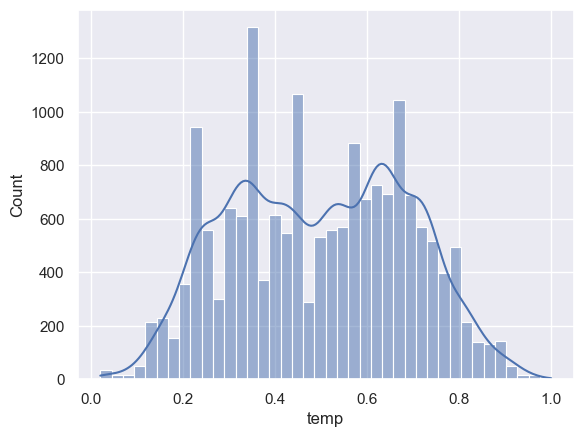

In [156]:
g1 = sb.histplot(data = bike_data_hour['temp'], kde=True)


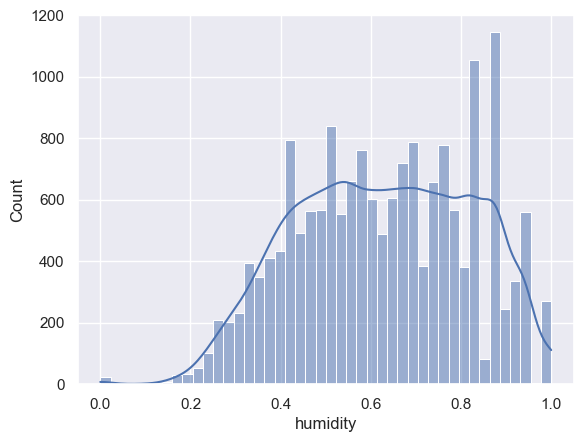

In [157]:
g1 = sb.histplot(data = bike_data_hour['humidity'], kde=True)

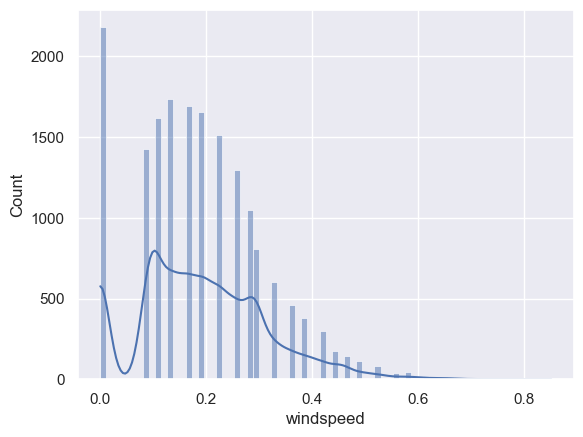

In [158]:
g1 = sb.histplot(data = bike_data_hour['windspeed'], kde=True)

#### 3.3.2. Box-Cox Transformation

We apply Box-Cox transformation to `total_count`. Our goal is to normalise all the values of  `total_count` to remove its outliers, so that it would affect our accuracy less. The resulting box plot after the transformation automatically removes the outliers, and allows our target variable to closely resemble a normal distribution.

In doing so, this will improve the predictive power of our analytical model by cutting away white noise in the form of outliers. 


In [159]:
import scipy.stats as stats

# perform box-cox transformation on total_count variable
bc_trans, bc_lambda = stats.boxcox(bike_data_hour['total_count'])

# print the lambda value
print(bc_lambda)

# replace the total_count variable with the box-cox transformed values
bike_data_hour['total_count'] = bc_trans


0.305430867537719


Text(0.5, 0, 'total_count')

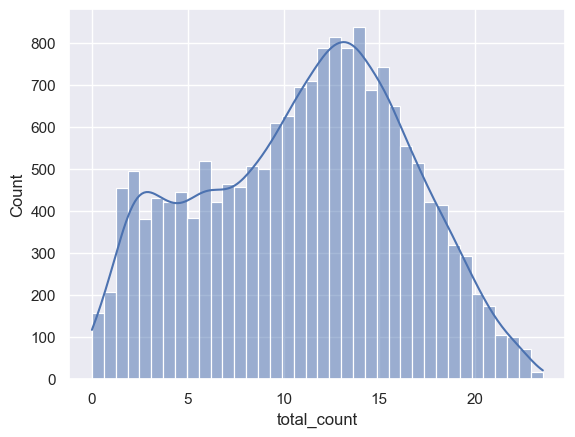

In [160]:
g1 = sb.histplot(data = bike_data_hour['total_count'], kde=True)
g1.set_xlabel('total_count')


Text(0.5, 0, 'total_count')

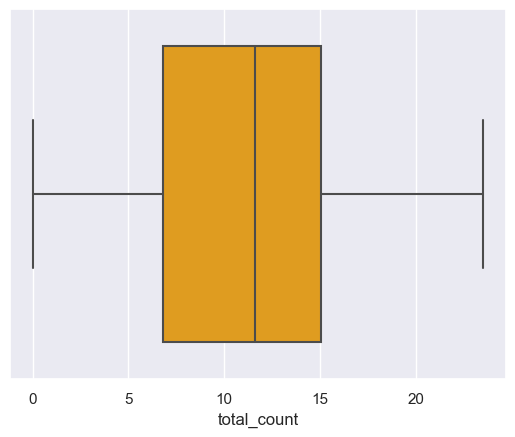

In [161]:
# plot boxplot on second y-axis
g2 = sb.boxplot(x=bike_data_hour['total_count'], color='orange')
g2.set_xlabel('total_count')

### 3.4. Dropping of Low Correlation Values 

From the correlation plot of the individual categories against `total_count`, we observe the different correlations each category has with `total_count` and drop all the categories that have a correlation range of between -0.2 to 0.2. We do so because categories with this range of correlation have no strong relationship with `total_count`, which is not what we are looking for.

It should be noted that we choose to keep values that are less than -0.2 as well, meaning large negative numbers. While these categories have a negative relationship, they still exert significant influence on `total_count` and hence should also be taken into account as a predictor variable.


In [162]:
bike_data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 62 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   season                             17379 non-null  object 
 1   temp                               17379 non-null  float64
 2   humidity                           17379 non-null  float64
 3   windspeed                          17379 non-null  float64
 4   total_count                        17379 non-null  float64
 5   is_peak_hour                       17379 non-null  int8   
 6   season_Fall                        17379 non-null  uint8  
 7   season_Spring                      17379 non-null  uint8  
 8   season_Summer                      17379 non-null  uint8  
 9   season_Winter                      17379 non-null  uint8  
 10  year_2011                          17379 non-null  uint8  
 11  year_2012                          17379 non-null  uin

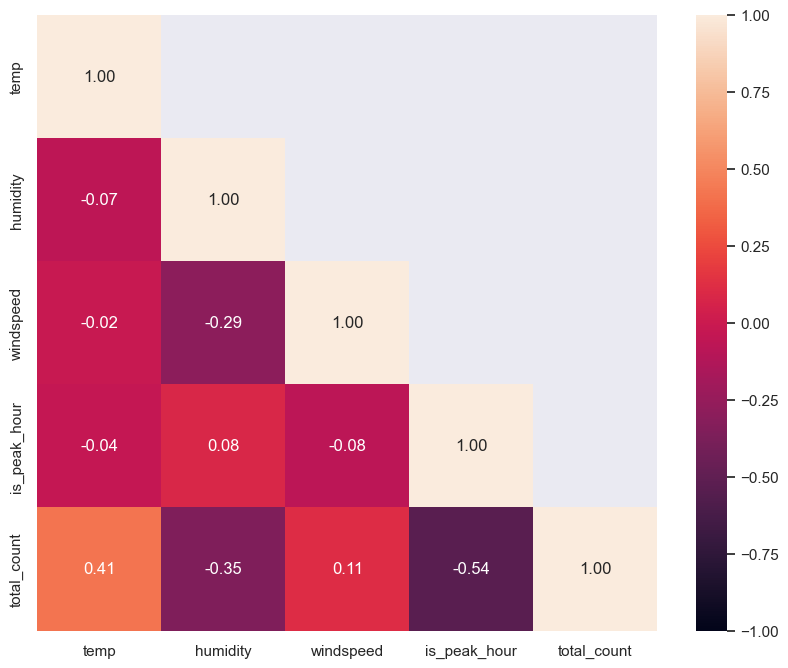

In [163]:
fig,ax = plt.subplots(figsize=(10, 8))

corrMatt = bike_data_hour[['temp',
                    'humidity', 
                    'windspeed', 
                    'is_peak_hour',
                    'total_count']].corr()

np.tril(np.ones(corrMatt.shape)).astype(bool)
df_lt = corrMatt.where(np.tril(np.ones(corrMatt.shape)).astype(bool))
sb.heatmap(df_lt, vmin = -1, vmax = 1, annot = True, fmt = ".2f")
plt.show()


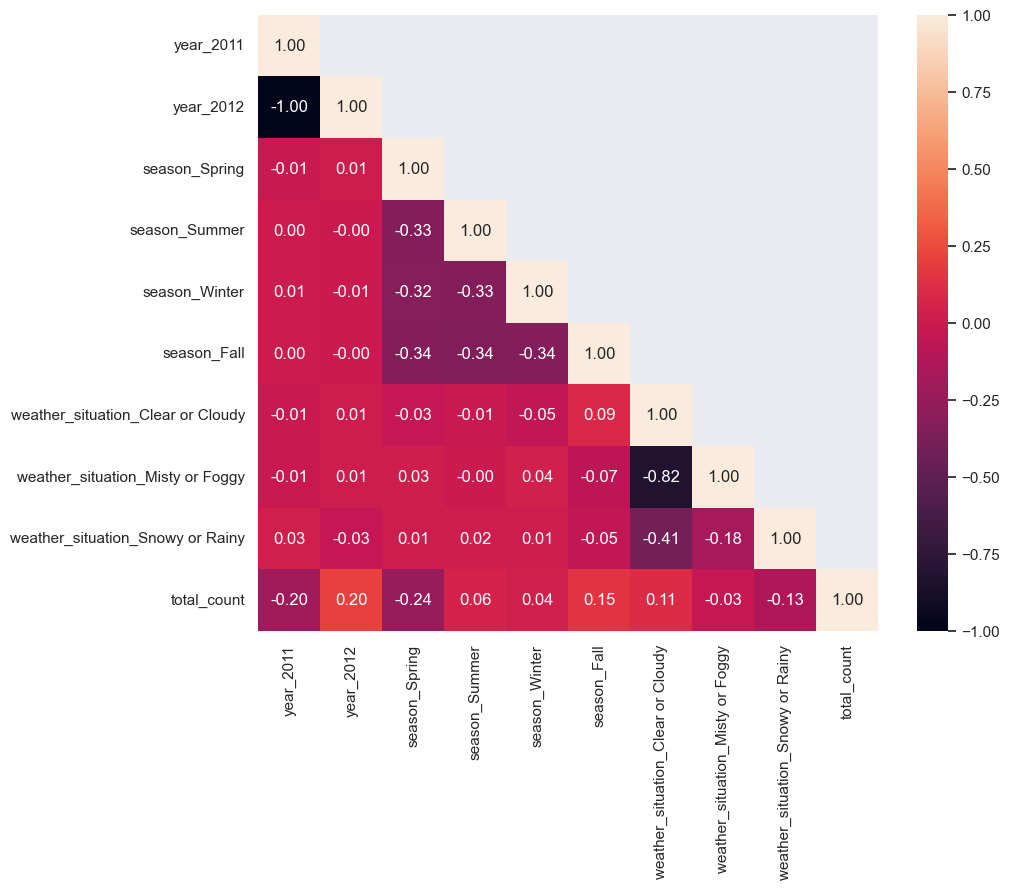

In [164]:
fig,ax = plt.subplots(figsize=(10, 8))

corrMatt = bike_data_hour[['year_2011',
                    'year_2012',
                    'season_Spring',
                    'season_Summer', 
                    'season_Winter', 
                    'season_Fall',
                    'weather_situation_Clear or Cloudy',
                    'weather_situation_Misty or Foggy',
                    'weather_situation_Snowy or Rainy',
                    'total_count']].corr()

np.tril(np.ones(corrMatt.shape)).astype(bool)
df_lt = corrMatt.where(np.tril(np.ones(corrMatt.shape)).astype(bool))
sb.heatmap(df_lt, vmin = -1, vmax = 1, annot = True, fmt = ".2f")
plt.show()


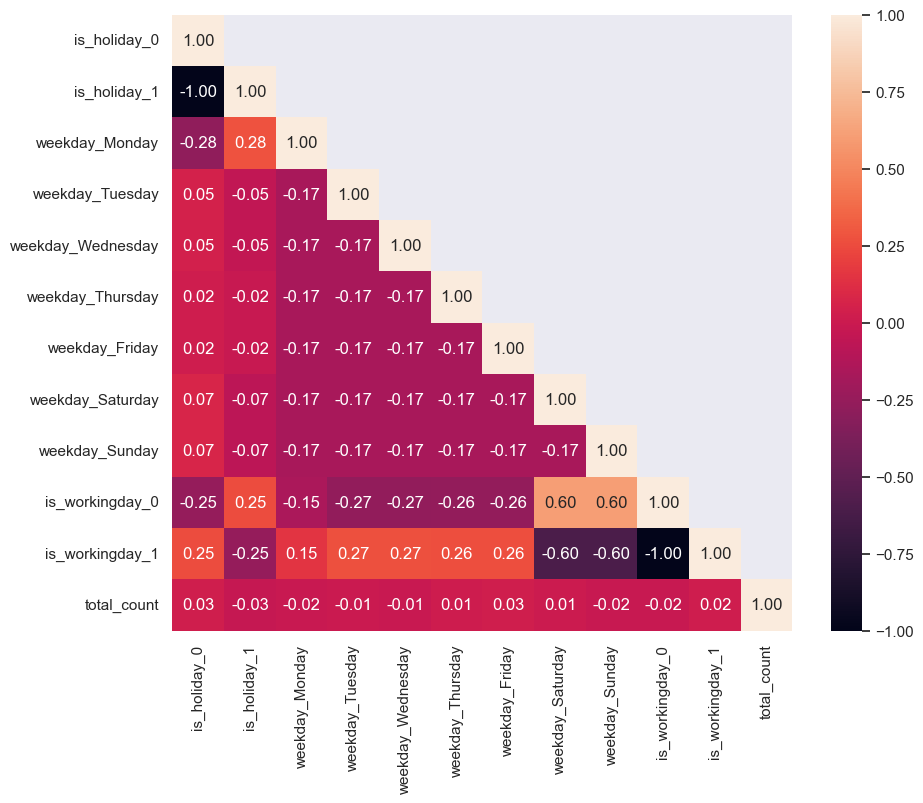

In [165]:
fig,ax = plt.subplots(figsize=(10, 8))

corrMatt = bike_data_hour[['is_holiday_0',
                    'is_holiday_1', 
                    'weekday_Monday', 
                    'weekday_Tuesday',
                    'weekday_Wednesday',
                    'weekday_Thursday',
                    'weekday_Friday',
                    'weekday_Saturday',
                    'weekday_Sunday',
                    'is_workingday_0',
                    'is_workingday_1',
                    'total_count']].corr()

np.tril(np.ones(corrMatt.shape)).astype(bool)
df_lt = corrMatt.where(np.tril(np.ones(corrMatt.shape)).astype(bool))
sb.heatmap(df_lt, vmin = -1, vmax = 1, annot = True, fmt = ".2f")
plt.show()

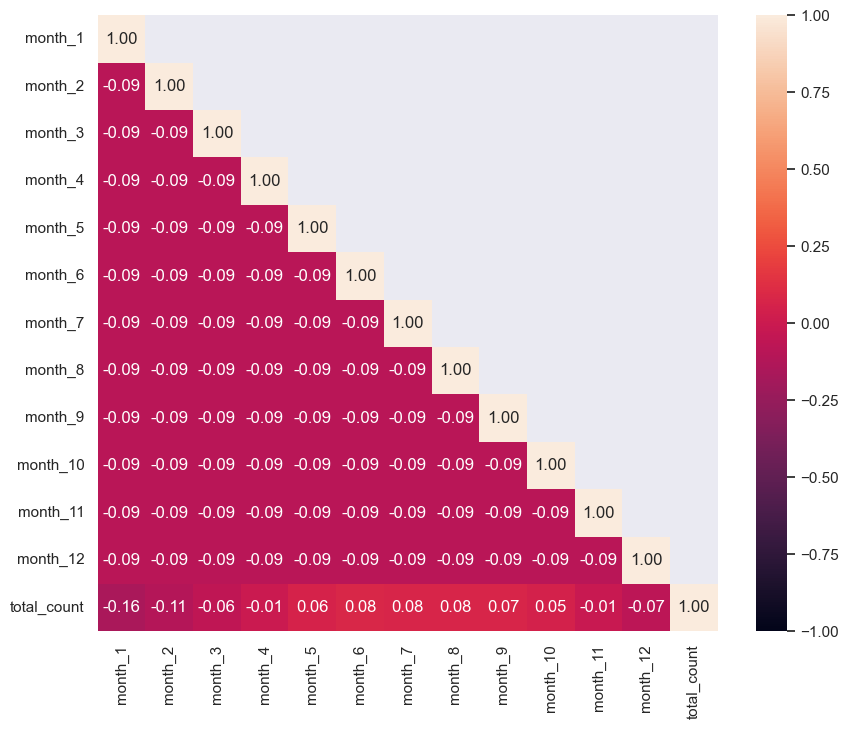

In [166]:
fig,ax = plt.subplots(figsize=(10, 8))

corrMatt = bike_data_hour[['month_1',
                    'month_2', 
                    'month_3', 
                    'month_4',
                    'month_5',
                    'month_6',
                    'month_7',
                    'month_8',
                    'month_9',
                    'month_10',
                    'month_11',
                    'month_12',
                    'total_count']].corr()

np.tril(np.ones(corrMatt.shape)).astype(bool)
df_lt = corrMatt.where(np.tril(np.ones(corrMatt.shape)).astype(bool))
sb.heatmap(df_lt, vmin = -1, vmax = 1, annot = True, fmt = ".2f")
plt.show()

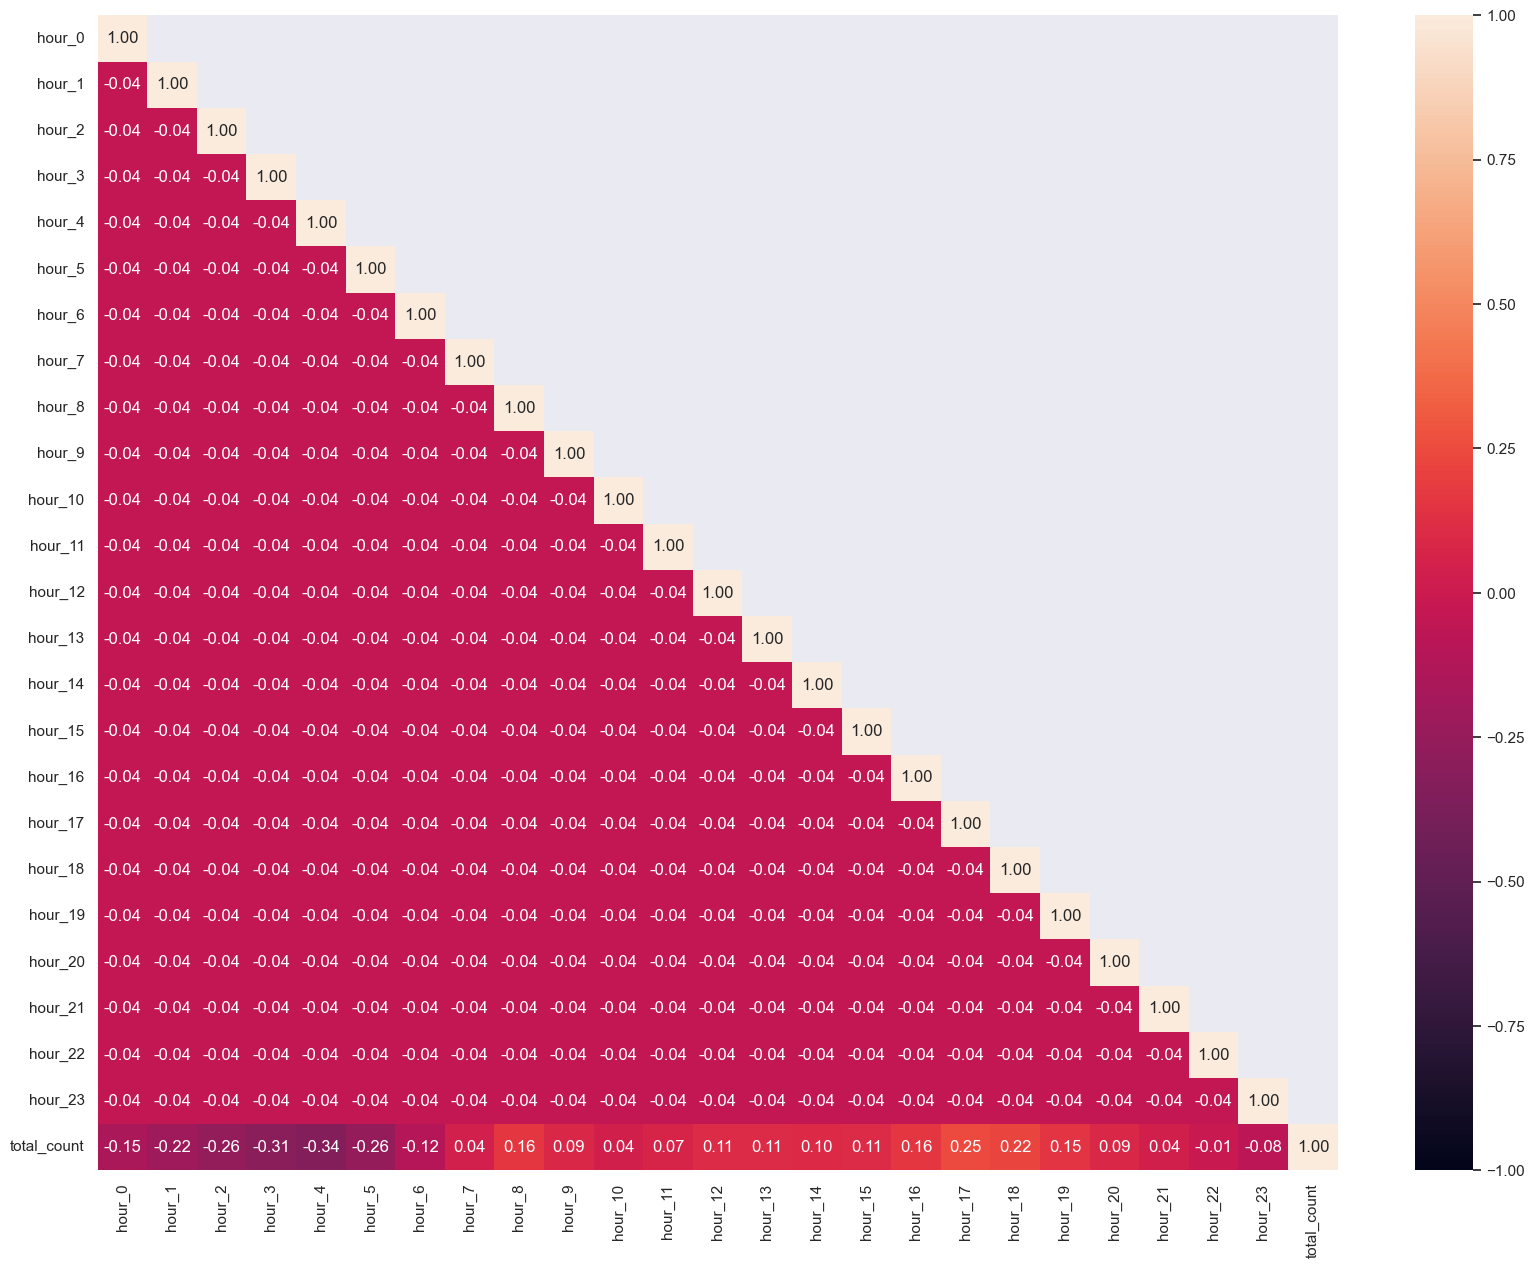

In [167]:
fig,ax = plt.subplots(figsize=(20, 15))

corrMatt = bike_data_hour[['hour_0',
                    'hour_1', 
                    'hour_2', 
                    'hour_3',
                    'hour_4',
                    'hour_5',
                    'hour_6',
                    'hour_7',
                    'hour_8',
                    'hour_9',
                    'hour_10',
                    'hour_11',
                    'hour_12', 
                    'hour_13',
                    'hour_14',
                    'hour_15',
                    'hour_16',
                    'hour_17',
                    'hour_18',
                    'hour_19',
                    'hour_20',
                    'hour_21',
                    'hour_22', 
                    'hour_23',
                    'total_count']].corr()

np.tril(np.ones(corrMatt.shape)).astype(bool)
df_lt = corrMatt.where(np.tril(np.ones(corrMatt.shape)).astype(bool))
sb.heatmap(df_lt, vmin = -1, vmax = 1, annot = True, fmt = ".2f")
plt.show()

In [168]:
bike_data_hour.to_csv('new_before_dropping_hour.csv',index=False)

# Dropping redundant values


In [169]:
low = -0.2
high = 0.2

corr = bike_data_hour.select_dtypes(include=np.number).corr()

# create a boolean mask for selecting columns
mask = ((corr['total_count'] < low) & (corr['total_count'] >= -1)) | ((corr['total_count'] > high) & (corr['total_count'] <= 1))

# select columns where mask is True
selected_columns = corr.loc[:,mask]

# drop the selected columns from the original dataframe
bike_data_hour = bike_data_hour[selected_columns.columns]


In [170]:
bike_data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp           17379 non-null  float64
 1   humidity       17379 non-null  float64
 2   total_count    17379 non-null  float64
 3   is_peak_hour   17379 non-null  int8   
 4   season_Spring  17379 non-null  uint8  
 5   year_2011      17379 non-null  uint8  
 6   year_2012      17379 non-null  uint8  
 7   hour_1         17379 non-null  uint8  
 8   hour_2         17379 non-null  uint8  
 9   hour_3         17379 non-null  uint8  
 10  hour_4         17379 non-null  uint8  
 11  hour_5         17379 non-null  uint8  
 12  hour_17        17379 non-null  uint8  
 13  hour_18        17379 non-null  uint8  
dtypes: float64(3), int8(1), uint8(10)
memory usage: 594.1 KB


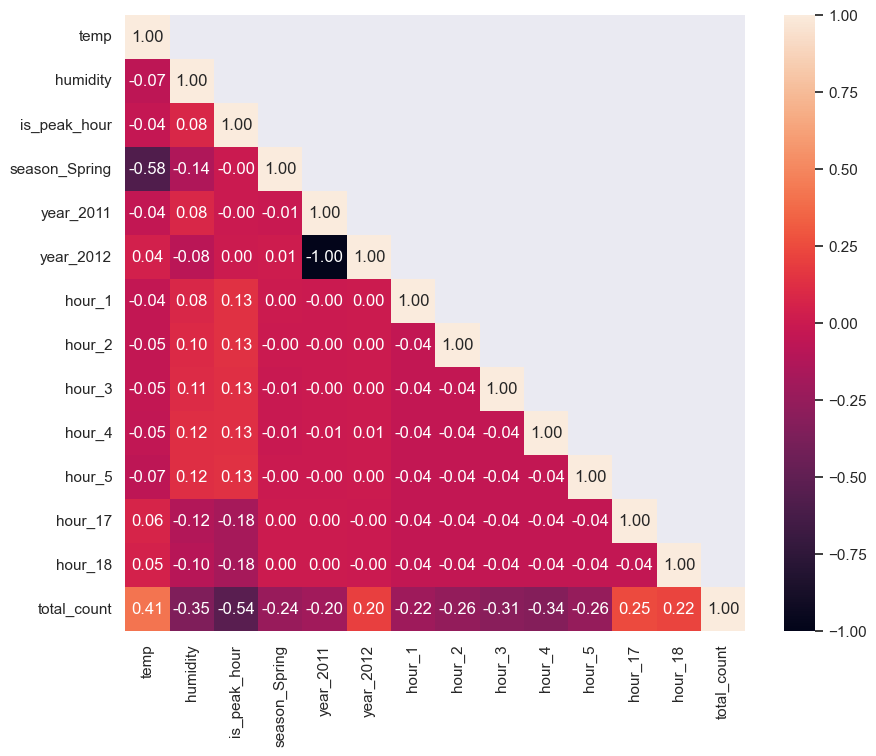

In [171]:
# remove 'total_count' column and store it in a variable
total_count = bike_data_hour.pop('total_count')

# append the 'total_count' column to the end of the dataframe
bike_data_hour.insert(len(bike_data_hour.columns), 'total_count', total_count)

fig,ax = plt.subplots(figsize=(10, 8))

corrMatt = bike_data_hour.corr()

np.tril(np.ones(corrMatt.shape)).astype(bool)
df_lt = corrMatt.where(np.tril(np.ones(corrMatt.shape)).astype(bool))
sb.heatmap(df_lt, vmin = -1, vmax = 1, annot = True, fmt = ".2f")
plt.show()


In [172]:
bike_data_hour.to_csv('new_hour.csv',index=False)